In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

## Detect Face , Mouth and Smile

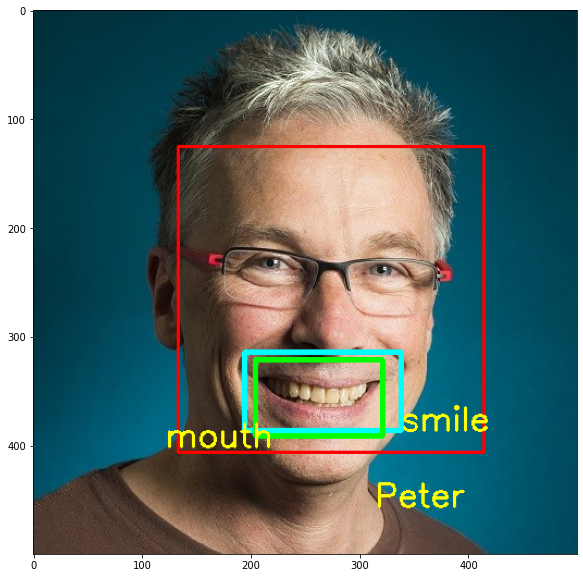

In [21]:
image = cv2.imread('peter.jpg')
gray = cv2.imread('peter.jpg',0)
cascade =  cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
smilecascade=cv2.CascadeClassifier('haarcascade_smile.xml')
mouthcascade=cv2.CascadeClassifier('haarcascade_mcs_mouth.xml')
faces = classifier.detectMultiScale(gray, scaleFactor = 1.03, minNeighbors = 3, minSize=(80,80))

font=cv2.FONT_HERSHEY_SIMPLEX

for face in faces:
    x, y, w, h = face
    cv2.rectangle(image, (x,y), (x+w, y+h), (0,0,255), 2)
    cv2.putText(image,'Peter',(x+w-100, y+h+50),font,1,(0,255,255),2)
    face_region = gray[y:y+h, x:x+w]

    smiles = smilecascade.detectMultiScale(face_region, scaleFactor=4, minNeighbors=5, minSize=(50,50))
    mouths = mouthcascade.detectMultiScale(face_region, scaleFactor=1.3, minNeighbors=20, minSize=(50,50))

    for smile in smiles:
        x2, y2, w2, h2 = smile 
        cv2.rectangle(image, (x+x2, y+y2), (x+x2+w2, y+y2+h2), (255, 255, 0), 3)
        cv2.putText(image,'smile',(x+x2+w2, y+y2+h2),font,1,(0,255,255),2)
    for mouth in mouths:
        x3, y3, w3, h3 = mouth 
        cv2.rectangle(image, (x+x3, y+y3), (x+x3+w3, y+y3+h3), (0, 255, 0), 3)
        cv2.putText(image,'mouth',(x+x3+w3-200, y+y3+h3+10),font,1,(0,255,255),2)
plt.figure(figsize=(10,10))
plt.imshow(image[:,:,::-1])

## Face Detection iamge from camera

In [ ]:
cascade =  cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
webcam = cv2.VideoCapture(0)
(x_,img)=webcam.read()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = classifier.detectMultiScale(gray, scaleFactor = 1.03, minNeighbors = 5, minSize=(120,120))
for face in faces:
    x, y, w, h = face 
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    cv2.putText(img,'Face',(x,y-20),font,2,(0,0,255),2)

plt.figure(figsize=(10, 10))
plt.imshow(img[:,:,::-1])